In [2]:
# IMPORT PACKAGES

import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#import statistics as stat

total_trainings = 20
file_name = "training"
delete_zeroes = False

In [3]:
indices = {

    "episode" : 0,
    "tellability" : 1,
    "stepnumber" : 2,
    "plotlength" : 2,
    "functional_units" : 3,
    "ployvalent_vertices" : 4,
    "suspense" : 5,

    "denied_request" : 6,
    "nested_goals" : 7,
    "retaliation" : 8,
    "intentional_problem_solution" : 9,
    "fortuitous_problem_resolution" : 10,
    "success_born_of_adversity" : 11,
    "fleeting_success" : 12,
    "starting_over" : 13,
    "giving_up" : 14,
    "sacrifice" : 15,
    "honored_request" : 16,

    "isSick_EmptyHappening" : 17,
    "isSick_StormHappening" : 18,
    "isSick_FoodStolenHappening" : 19,
    "isSick_FoodPoisoningHappening" : 20,
    "isSick_LooseFriendHappening" : 21,
    "isSick_HomesickHappening" : 22,
    "isSick_FireHappening" : 23,
    "isSick_ShipRescueHappening" : 24,

    "isAlive_EmptyHappening" : 25,
    "isAlive_StormHappening" : 26,
    "isAlive_FoodStolenHappening" : 27,
    "isAlive_FoodPoisoningHappening" : 28,
    "isAlive_LooseFriendHappening" : 29,
    "isAlive_HomesickHappening" : 30,
    "isAlive_FireHappening" : 31,
    "isAlive_ShipRescueHappening" : 32,

    "onCruise_EmptyHappening" : 33,
    "onCruise_StormHappening" : 34,
    "onCruise_FoodStolenHappening" : 35,
    "onCruise_FoodPoisoningHappening" : 36,
    "onCruise_LooseFriendHappening" : 37,
    "onCruise_HomesickHappening" : 38,
    "onCruise_FireHappening" : 39,
    "onCruise_ShipRescueHappening" : 40,

    "hasAtLeastOneFriend_EmptyHappening" : 41,
    "hasAtLeastOneFriend_StormHappening" : 42,
    "hasAtLeastOneFriend_FoodStolenHappening" : 43,
    "hasAtLeastOneFriend_FoodPoisoningHappening" : 44,
    "hasAtLeastOneFriend_LooseFriendHappening" : 45,
    "hasAtLeastOneFriend_HomesickHappening" : 46,
    "hasAtLeastOneFriend_FireHappening" : 47,
    "hasAtLeastOneFriend_ShipRescueHappening" : 48,

    "ownsFood_EmptyHappening" : 49,
    "ownsFood_StormHappening" : 50,
    "ownsFood_FoodStolenHappening" : 51,
    "ownsFood_FoodPoisoningHappening" : 52,
    "ownsFood_LooseFriendHappening" : 53,
    "ownsFood_HomesickHappening" : 54,
    "ownsFood_FireHappening" : 55,
    "ownsFood_ShipRescueHappening" : 56,

    "hasHut_EmptyHappening" : 57,
    "hasHut_StormHappening" : 58,
    "hasHut_FoodStolenHappening" : 59,
    "hasHut_FoodPoisoningHappening" : 60,
    "hasHut_LooseFriendHappening" : 61,
    "hasHut_HomesickHappening" : 62,
    "hasHut_FireHappening" : 63,
    "hasHut_ShipRescueHappening" : 64,

    "isBurning_EmptyHappening" : 65,
    "isBurning_StormHappening" : 66,
    "isBurning_FoodStolenHappening" : 67,
    "isBurning_FoodPoisoningHappening" : 68,
    "isBurning_LooseFriendHappening" : 69,
    "isBurning_HomesickHappening" : 70,
    "isBurning_FireHappening" : 71,
    "isBurning_ShipRescueHappening" : 72,

    "isHomesick_EmptyHappening" : 73,
    "isHomesick_StormHappening" : 74,
    "isHomesick_FoodStolenHappening" : 75,
    "isHomesick_FoodPoisoningHappening" : 76,
    "isHomesick_LooseFriendHappening" : 77,
    "isHomesick_HomesickHappening" : 78,
    "isHomesick_FireHappening" : 79,
    "isHomesick_ShipRescueHappening" : 80,

    "isOnIsland_EmptyHappening" : 81,
    "isOnIsland_StormHappening" : 83,
    "isOnIsland_FoodStolenHappening" : 83,
    "isOnIsland_FoodPoisoningHappening" : 84,
    "isOnIsland_LooseFriendHappening" : 85,
    "isOnIsland_HomesickHappening" : 86,
    "isOnIsland_FireHappening" : 87,
    "isOnIsland_ShipRescueHappening" : 88,

    "isHungry_EmptyHappening" : 89,
    "isHungry_StormHappening" : 90,
    "isHungry_FoodStolenHappening" : 91,
    "isHungry_FoodPoisoningHappening" : 92,
    "isHungry_LooseFriendHappening" : 93,
    "isHungry_HomesickHappening" : 94,
    "isHungry_FireHappening" : 95,
    "isHungry_ShipRescueHappening" : 96,

    "foodIsPoisoned_EmptyHappening" : 97,
    "foodIsPoisoned_StormHappening" : 98,
    "foodIsPoisoned_FoodStolenHappening" : 99,
    "foodIsPoisoned_FoodPoisoningHappening" : 100,
    "foodIsPoisoned_LooseFriendHappening" : 101,
    "foodIsPoisoned_HomesickHappening" : 102,
    "foodIsPoisoned_FireHappening" : 103,
    "foodIsPoisoned_ShipRescueHappening" : 104

}

def index(feature):
    return indices[feature]

def feature(index):
    for feature, search_index in indices.items():
        if index == search_index:
            return feature

In [4]:
# READ IN ALL TRAININGS
all_trainings = []

# all_trainings:
# Dimension 1: File:   Number of training
# Dimension 2: Line:   Number of Episode
# Dimension 3: Column: Data category
# Dimension 4: Value:  Data value

for i in range(1,total_trainings+1):
    file = file_name + "{}.csv"
    with open(file.format(i)) as csv_file:
        episodes_csv = []
        filerows = csv.reader(csv_file)
        # skip first line (header)
        iter_filerows = iter(filerows)
        next(iter_filerows)
        # iterate over all lines
        for row in iter_filerows:
            episodes_csv.append([float(elem) for elem in row[:]])
        
        all_trainings.append(episodes_csv)

In [5]:
#all_np_trainings = []

# Convert all data into np_array
#for i in range(0,total_trainings):
#     all_trainings[i] = np.array(all_trainings[i])
#    np_episode = np.array(all_trainings[i])
#    all_np_trainings.append(np_episode)
    
#all_trainings = all_np_trainings

all_trainings = np.array(all_trainings)

In [6]:
# DELETE ALL EPISODES WITH ZERO TELLABILITY

if(delete_zeroes):
    all_trainings_wo_zero = []
    for t in range(0,total_trainings):
        training = all_trainings[t]
        new_training = []
        #iterate over all episodes
        for ep in range(0,len(training)):
            episode = training[ep]
            tellability = episode[index("tellability")]
            if(tellability != 0):
                new_training.append(episode)
        all_trainings_wo_zero.append(new_training)

    for i in range(0,len(all_trainings_wo_zero)):
        all_trainings_wo_zero[i] = np.array(all_trainings_wo_zero[i])
    
    all_trainings = np.array(all_trainings_wo_zero)
    #all_trainings = np.array(all_trainings)

In [16]:
# Save all Tellability values

# all_tell
# Dimension 1: Training
# Dimension 2: Episode (List of all Tellability values)
# Dimension 3: Tellability value of that Episode


def arrayOfAllValues(value):
    all_values = []
    
    # iterate over all trainings
    for j in range(0,total_trainings):
        training = all_trainings[j]
        values_of_training = []
        
        # iterate over all episodes of the current training
        for ep in range(0,len(training)):
            episode = training[ep]
            curr_value = episode[index(value)]
            values_of_training.append(curr_value)
        
        all_values.append(values_of_training)
    return all_values


# arryOfAllValues
# Dimension 1: Training
# Dimension 2: Episode
# Dimension 3: Value


# DEFINE THE TELLABILITY PLOT

def get_one_value_from_all_episodes(number_of_training, value):
    training_i = all_trainings[number_of_training-1]
    return training_i[:,index(value)]
    
    

def plot_values_of_training(number_of_training, value, fig):
    
    training_i = all_trainings[number_of_training]
    
    index_value = index(value)
    
    slope, intercept, r_value, p_value, std_error = stats.linregress(training_i[:,0],training_i[:,index_value])
    
    if(delete_zeroes):
        fig.plot(training_i[:,values])
        fig.plot(intercept + slope*training_i[:,0])
    else:
        fig.plot(training_i[:,0],training_i[:,index_value])
        fig.plot(training_i[:,0],intercept + slope*training_i[:,0])
    
    fig.set_xlabel('Episode')
    fig.set_ylabel('Tellability')
    fig.set_title('Training ' + str(number_of_training+1) + ", learning {:f}".format(slope))
    
    #return fig
    
    
def get_all_slopes_array(value):
    all_slopes_array = []
    for i in range(0,total_trainings):
        training_i = all_trainings[i]
        slope, intercept, r_value, p_value, std_error = stats.linregress(training_i[:,0],training_i[:,index(value)])
        all_slopes_array.append(slope)
    return all_slopes_array

def get_mean_slopes_array(value):
    all_mean_slopes_array = []
    additive_slopes = 0
    current_mean_slope = 0
    for i in range(0,total_trainings):
        
        #calculate slope
        training_i = all_trainings[i]
        slope, intercept, r_value, p_value, std_error = stats.linregress(training_i[:,0],training_i[:,index(value)])
        
        # calculate mean of all slopes until now
        additive_slopes += slope
        mean_slope = additive_slopes
        if(i!=0):
            mean_slope /= i
        
        # save mean of all slopes until now
        all_mean_slopes_array.append(mean_slope)
        
    return all_mean_slopes_array



def get_mean_slope(value):
    all_slopes_array = get_all_slopes_array(value)
    all_slopes_sum = 0
    for slope in all_slopes_array:
        all_slopes_sum += slope
    mean_slope = all_slopes_sum/len(all_slopes_array)
    return mean_slope

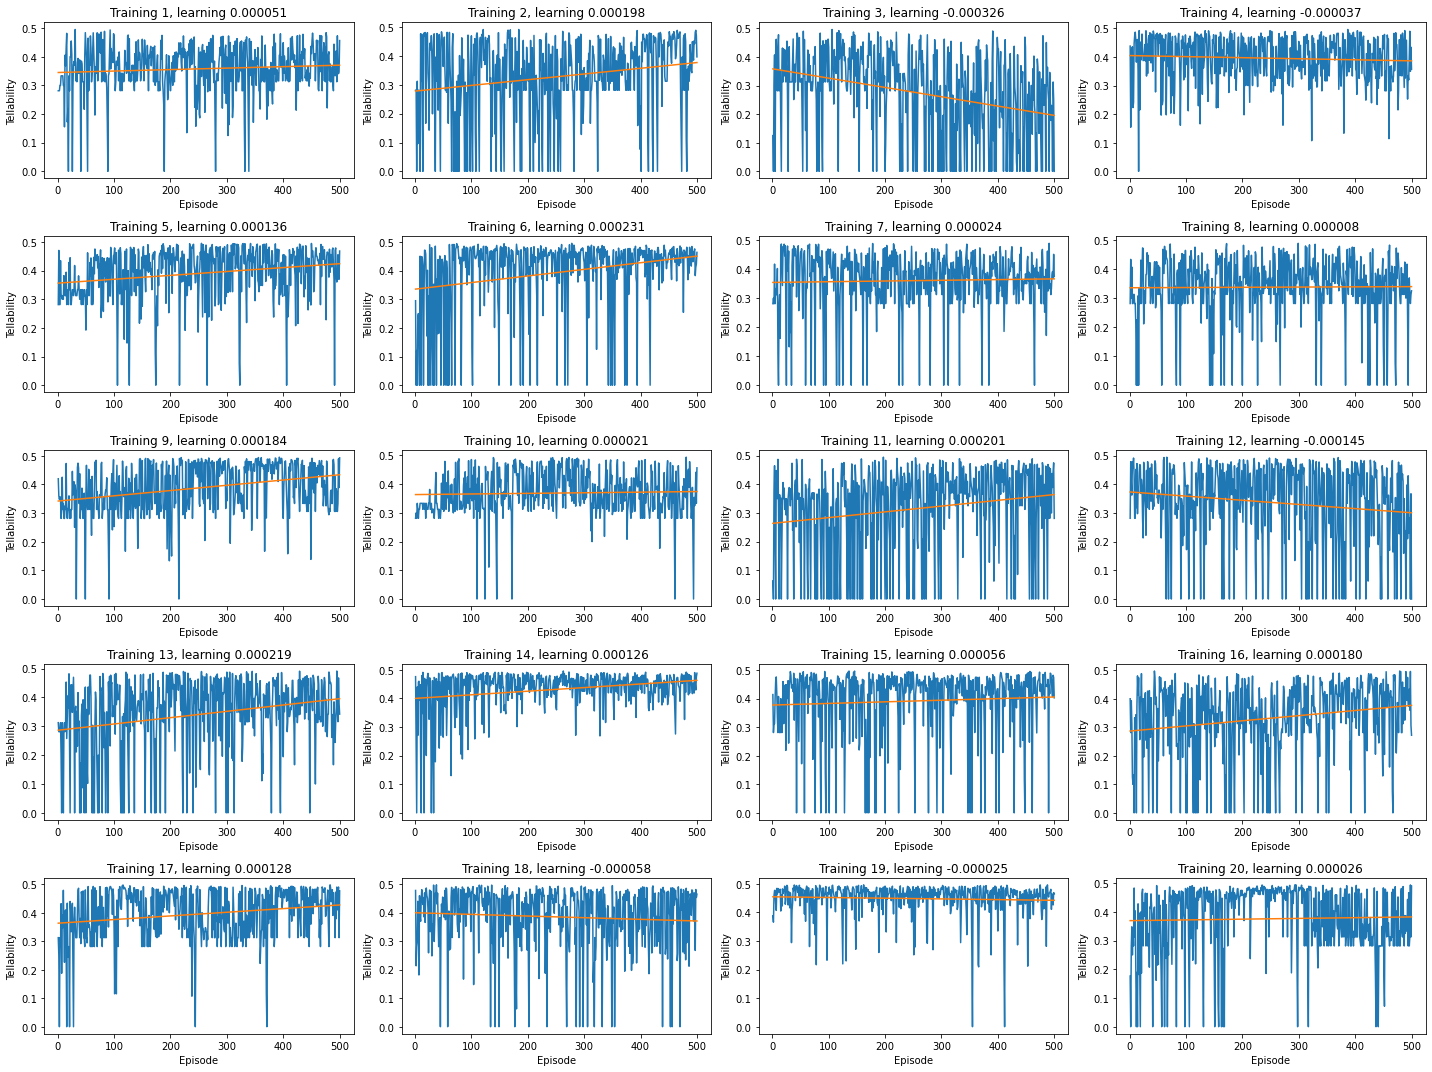

In [17]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
index_axes = [axes[0,0],
              axes[0,1],
              axes[0,2],
              axes[0,3],
              
              axes[1,0],
              axes[1,1],
              axes[1,2],
              axes[1,3],
              
              axes[2,0],
              axes[2,1],
              axes[2,2],
              axes[2,3],
              
              axes[3,0],
              axes[3,1],
              axes[3,2],
              axes[3,3],
              
              axes[4,0],
              axes[4,1],
              axes[4,2],
              axes[4,3],
              ]
for i in range(total_trainings):
    plot_values_of_training(i, "tellability", index_axes[i])

fig.tight_layout()
plt.show()

Mean slope: 5.994095316756591e-05


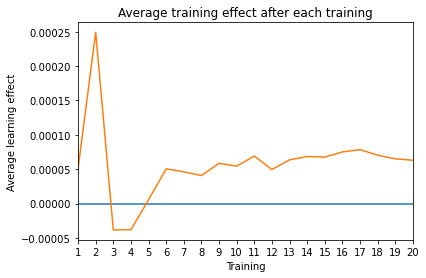

In [18]:
mean_slopes_array = get_mean_slopes_array("tellability")
mean_slope = get_mean_slope("tellability")

print("Mean slope:", mean_slope)
plt.ylabel("Average learning effect")
plt.xlabel("Training")
plt.title("Average training effect after each training")
plt.xlim([1,total_trainings])
plt.xticks(np.arange(1, total_trainings+1, 1.0))
plt.plot([0, total_trainings], [0,0])
plt.plot(range(1,total_trainings+1),mean_slopes_array)

In [19]:
def boxplot_for_one_training(training, value):
    all_values = get_one_value_from_all_episodes(training,index(value))
    plt.boxplot(all_values)
    
def multiple_boxplots_for_all_trainings(value):
    all_values = []
    for i in range(0,total_trainings):
        all_values.append(get_one_value_from_all_episodes(i,value))
    plt.boxplot(all_values)
    plt.xlabel("Training")
    plt.ylabel(value)
    plt.title('Distribution of ' + value + ' for each training')
    
def one_boxplot_for_all_trainings(value):
    all_values = []
    for i in range(0,total_trainings):
        values = get_one_value_from_all_episodes(i,value)
        for value_i in values:
            all_values.append(value_i)
    plt.boxplot(all_values)
    plt.ylabel(value)
    plt.title('Distribution of ' + value + ' for all trainings')

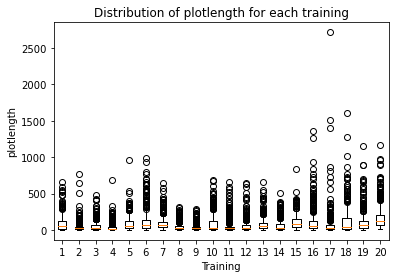

In [20]:
multiple_boxplots_for_all_trainings("plotlength")

Median: 43.0
Mean: 82.5743
Mode: 16.0


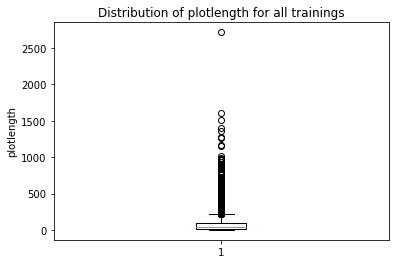

In [21]:
one_boxplot_for_all_trainings("plotlength")


def median(value):
    median = np.median(arrayOfAllValues(value))
    return median

def mean(value):
    mean = np.mean(arrayOfAllValues(value))
    return mean

def mode(value):
    array, mode_array = stats.mode(arrayOfAllValues(value))
    mode = 0
    mode_count = 0
    for m in mode_array[0]:
        if(m > mode_count):
            mode = array[0][m]
            mode_count = m
    return mode


median_plotlength = median("plotlength")
mean_plotlength = mean("plotlength")
mode_plotlength = mode("plotlength")


print('Median: ' + str(median_plotlength))
print('Mean: ' + str(mean_plotlength))
print('Mode: ' + str(mode_plotlength))

In [22]:
def feature_development_data(training, feature):
    feature_data = []
    for ep in training:
        feature_data.append(ep[index(feature)])
    return feature_data


def plot_feature(feature, fig):
    
    for training in all_trainings:
        feature_data = feature_development_data(training, feature)
        fig.plot(feature_data)
    
    fig.set_xlabel("Episode")
    fig.set_ylabel("Weight")
    fig.set_ylim([-0.4, 1.1])
    fig.set_title('Feature ' + feature + '\nfor each training')

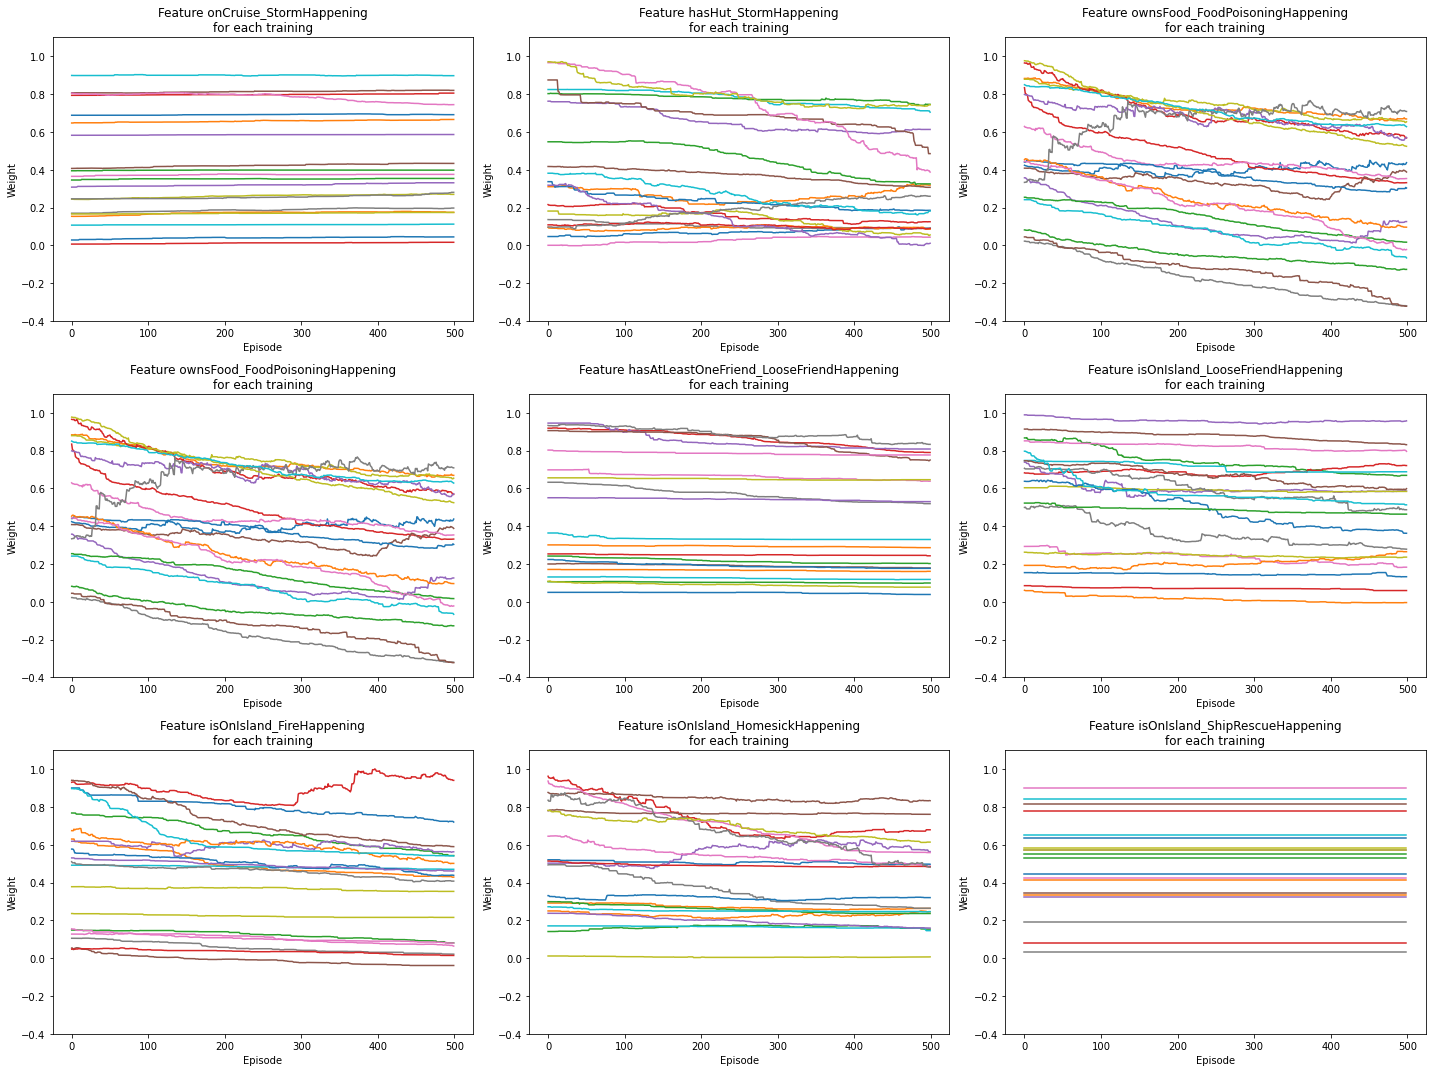

In [23]:
semantic_features = ["onCruise_StormHappening",
                     "hasHut_StormHappening",
                     "ownsFood_FoodPoisoningHappening",
                     "ownsFood_FoodPoisoningHappening",
                     "hasAtLeastOneFriend_LooseFriendHappening",
                     "isOnIsland_LooseFriendHappening",
                     "isOnIsland_FireHappening",
                     "isOnIsland_HomesickHappening",
                     "isOnIsland_ShipRescueHappening",
                     # EmptyHappening with all features
                    ]

#feature_names = ["onCruise_StormHappening",
#                 "hasHut_StormHappening",
#                 "ownsFood_FoodPoisoningHappening",
#                 "ownsFood_FoodPoisoningHappening",
#                 "hasAtLeastOneFriend_LooseFriendHappening",
#                 "isOnIsland_LooseFriendHappening",
#                 "isOnIsland_FireHappening",
#                 "isOnIsland_HomesickHappening",
#                 "isOnIsland_ShipRescueHappening"]


fig, axes = plt.subplots(3,3,figsize=(20,15))
index_axes = [axes[0,0],
              axes[0,1],
              axes[0,2],
              
              axes[1,0],
              axes[1,1],
              axes[1,2],
              
              axes[2,0],
              axes[2,1],
              axes[2,2],
             ]

for f in range(0, len(semantic_features)):
    plot_feature(semantic_features[f], index_axes[f])

fig.tight_layout()
plt.show()




#for t in range(0,total_trainings):
#    feature_data = feature_development_data(t, index_onCruise_StormHappening)
#    plt.plot(feature_data)

In [24]:
def max_value(value_name):
    max = 0
    value_index = index(value_name)
    for training in all_trainings:
        for ep in training:
            value = ep[value_index]
            if(value > max):
                max = value
    return max

def min_value_wo_0(value_name):
    min = 100000
    value_index = index(value_name)
    for training in all_trainings:
        for ep in training:
            value = ep[value_index]
            if(value < min and value!=0):
                min = value
    return min

def min_value_wo_0_tell(value_name):
    min = 100000
    value_index = index(value_name)
    for training in all_trainings:
        for ep in training:
            value = ep[value_index]
            tell = ep[index("tellability")]
            if(value < min and tell!=0):
                min = value
    return min

def min_value(value_name):
    min = 100000
    value_index = index(value_name)
    for training in all_trainings:
        for ep in training:
            value = ep[value_index]
            if(value < min):
                min = value
    return min

def print_min_max_wo_0(value):
    print('Minimal ' + value + ': ', min_value_wo_0(value))
    print('Maximal ' + value + ': ', max_value(value))
    print("\n")
    
def print_min_max_wo_0_tell(value):
    print('Minimal ' + value + ': ', min_value_wo_0_tell(value))
    print('Maximal ' + value + ': ', max_value(value))
    print("\n")
    
def print_min_max(value):
    print('Minimal ' + value + ': ', min_value(value))
    print('Maximal ' + value + ': ', max_value(value))
    print("\n")

In [25]:
def present_FUs():
    present_FUs = []
    for training in all_trainings:
        for ep in training:
            for fu in range(index("denied_request"), index("honored_request")+1):
                fu_value = ep[fu]
                fu_name = feature(fu)
                if(fu_value != 0.0 and fu_name not in present_FUs):
                    present_FUs.append(fu_name)
    return present_FUs

def model_fu(fu_name):
    fu_values = arrayOfAllValues(fu_name)
    for t in range(0,len(all_trainings)):
        plt.plot(fu_values[t])
        
def average_fu_value(fu_name):
    arrayOfAllValues(fu_name)
    print(len(fu_name))

In [26]:
present_FUs()
average_fu_value("nested_goals")

12


In [27]:
print_min_max_wo_0("tellability")

print_min_max("plotlength")
print_min_max_wo_0_tell("plotlength")

print_min_max_wo_0_tell("nested_goals")
print(mean("nested_goals"))
print(median("nested_goals"))
print(mode("nested_goals"))

print_min_max_wo_0_tell("success_born_of_adversity")
print(mean("success_born_of_adversity"))
print(median("success_born_of_adversity"))
print(mode("success_born_of_adversity"))

Minimal tellability:  0.03441176470588235
Maximal tellability:  0.49790732268158544


Minimal plotlength:  3.0
Maximal plotlength:  2712.0


Minimal plotlength:  7.0
Maximal plotlength:  2712.0


Minimal nested_goals:  0.0
Maximal nested_goals:  1039.0


21.8354
2.0
0.0
Minimal success_born_of_adversity:  0.0
Maximal success_born_of_adversity:  310.0


8.4422
4.0
0.0


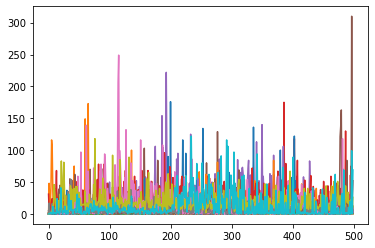

In [28]:
model_fu("success_born_of_adversity")

In [35]:
all_slopes = get_all_slopes_array("tellability")
print(all_slopes)

min_slope = 1000
for slope in all_slopes:
    if slope < min_slope:
        min_slope = slope

max_slope = 0
for slope in all_slopes:
    if slope > max_slope:
        max_slope = slope

slope_range = max_slope - min_slope

print('Min slope: ' + str(min_slope))
print('Max slope: ' + str(max_slope))
print('Slope range: ' + str(slope_range))

[5.1161820138080455e-05, 0.00019807020222757562, -0.00032575601829581524, -3.701059501738141e-05, 0.00013578117518456083, 0.0002307139896491263, 2.444867839179252e-05, 7.809466070058421e-06, 0.00018359308843014633, 2.1110047821619277e-05, 0.0002007854157818843, -0.0001452311590789319, 0.00021888564989230592, 0.00012605286012717272, 5.637378033336155e-05, 0.00018042108742925882, 0.00012815902598494917, -5.7828355402961214e-05, -2.47225018161978e-05, 2.600140550071353e-05]
Min slope: -0.00032575601829581524
Max slope: 0.0002307139896491263
Slope range: 0.0005564700079449416
